### Расчётно-графическая работа №1
*Выполнил студент группы R3341 Овчинников Павел (вариант №14)*

---

Для начала импортируем необходимые библиотеки и зададим выборки:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A14 = np.array([
6,  6,  5,  6,  11, 8,  7,  4,  4,  8,  3,  2,  3,  9,  7,
6,  9,  5,  8,  8,  7,  10, 8,  6,  9,  9,  10, 3,  10, 5,
7,  6,  8,  9,  9,  3,  8,  4,  11, 4,  6,  9,  2,  8,  7,
7,  7,  8,  4,  3,  6,  12, 10, 2,  3,  8,  6,  8,  2,  3,
8,  8,  7,  6,  9,  4,  4,  7,  6,  9,  6
])
B14 = np.array([
    58, 49, 46, 53, 63, 64, 53, 46, 59, 64, 50, 55, 57, 55, 68,
    48, 58, 54, 59, 66, 61, 69, 70, 51, 60, 47, 50, 43, 62, 48,
    40, 51, 46, 58, 63, 51, 65, 55, 55, 61, 45, 50, 44, 45, 57,
    65, 52, 60, 58, 27, 41, 60, 44, 38, 44, 59, 72, 43, 60, 50,
    55, 53, 51, 33, 53, 70, 55, 60, 50, 51, 50, 55, 57, 58, 61,
    52, 46, 56, 65, 52, 61, 52, 65, 51, 58, 54, 55, 64, 58, 68,
    52, 52, 47, 48, 55, 58, 72, 53, 69, 42, 41, 59, 56, 28, 50,
    47, 54, 52, 60, 47, 55, 48, 64, 63, 72, 51, 55, 50, 65, 66,
    42, 63, 59, 60, 70, 54, 40, 58, 49, 66, 59, 55, 50, 46, 58,
    73, 41, 68, 54, 48, 52, 52, 50, 67, 59, 43, 64, 57, 71, 67,
    54, 63, 63, 65, 60, 47, 72, 58, 55, 52, 53, 49, 59, 43, 45,
    45, 40, 54, 77, 49, 56, 45, 64, 69, 57, 50, 59, 74, 47, 38,
    54, 57, 52, 63, 42, 41, 57, 60, 60, 52, 49, 46, 60, 71, 57,
    47, 52, 51, 59, 42, 56, 43, 50, 44, 45, 59, 54, 56, 71, 63,
    50, 46, 42, 48, 59, 53, 64, 53, 54, 72, 55
])

Начнём с выборки A. Для неё требуется найти максимальный и минимальный элементы, а также размах:

In [44]:
# Вычисления
max_A14, min_A14 = A14.max(), A14.min()
size_A14 = max_A14 - min_A14

# Вывод результатов
print('max', 'min', 'size', sep='\t')
print(max_A14, min_A14, size_A14, sep='\t')

max	min	size
12	2	10


Далее построим статистический ряд для этой выборки:

In [45]:
# Вычисления
numbers, freqs = np.unique(A14, return_counts=True)
rel_freqs = freqs / freqs.sum()

# Вывод результатов
print('x_i', 'f_i', 'w_i', sep='\t')
print(*['\t'.join(map(str, i)) for i in list(zip(numbers.tolist(), freqs.tolist(), rel_freqs.round(5).tolist()))], sep='\n')

x_i	f_i	w_i
2	4	0.05634
3	7	0.09859
4	7	0.09859
5	3	0.04225
6	12	0.16901
7	9	0.12676
8	13	0.1831
9	9	0.12676
10	4	0.05634
11	2	0.02817
12	1	0.01408


Теперь на основе столбцов $x_i$ и $f_i$ отрисуем полигон частот:

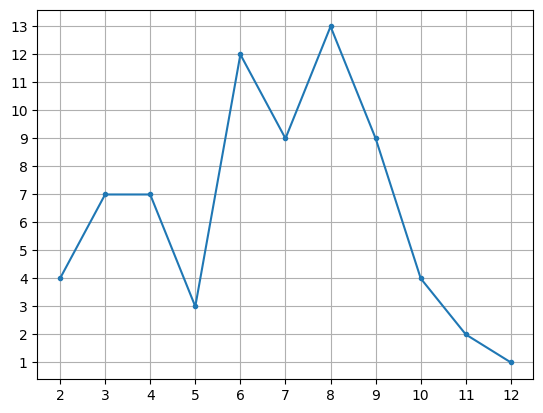

In [46]:
plt.plot(numbers, freqs, '.-')
plt.xticks(numbers)
plt.yticks(range(freqs.min(), freqs.max() + 1))
plt.grid()
plt.show()

In [47]:
# Вычисления
cumulative_freqs = np.concat(([0, 0], np.cumsum(rel_freqs), [1]))

# Вывод результатов
print(cumulative_freqs.round(5).tolist())

[0.0, 0.0, 0.05634, 0.15493, 0.25352, 0.29577, 0.46479, 0.59155, 0.77465, 0.90141, 0.95775, 0.98592, 1.0, 1.0]


Теперь запишем эмпирическую функцию распределения, основываясь на столбцах $x_i$ и $w_i$:
$$F(x) = \begin{cases}
0,& x \leqslant 2 \\
0.05634, & 2 < x \leqslant 3 \\
0.15493, & 3 < x \leqslant 4 \\
0.25352, & 4 < x \leqslant 5 \\
0.29577, & 5 < x \leqslant 6 \\
0.46479, & 6 < x \leqslant 7 \\
0.59155, & 7 < x \leqslant 8 \\
0.77465, & 8 < x \leqslant 9 \\
0.90141, & 9 < x \leqslant 10 \\
0.95775, & 10 < x \leqslant 11 \\
0.98592, & 11 < x \leqslant 12 \\
1, & x > 12
\end{cases}$$
И построим её график:

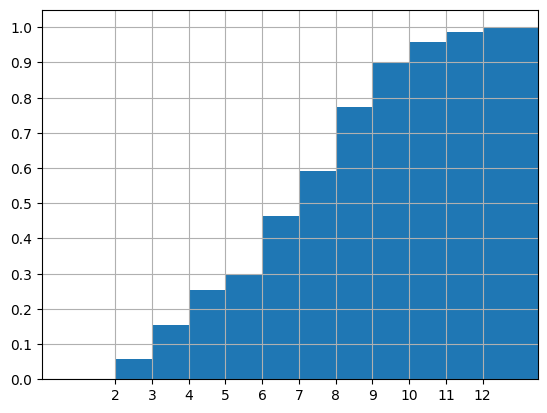

In [48]:
plt.stairs(cumulative_freqs, fill=True)
plt.xticks(range(2, 13))
plt.yticks(np.arange(0, 1.1, .1))
plt.xlim(0, 13.5)
plt.grid()
plt.show()

Теперь перейдём к расчёту эмпирических моментов. Начнём с начальных и затем от них перейдём к центральным. Нам понадобится формула $M_k = E[X^k]$. Построим таблицу, в которой будут указаны значения $x_i$, $f_i$, $x_i \cdot f_i$, $x_i^2 \cdot f_i$, $x_i^3 \cdot f_i$ и $x_i^4 \cdot f_i$:

In [49]:
# Вычисления
xf = np.multiply(numbers, freqs)
x2f = np.multiply(np.power(numbers, 2), freqs)
x3f = np.multiply(np.power(numbers, 3), freqs)
x4f = np.multiply(np.power(numbers, 4), freqs)

# Вывод результатов
print('x_i', 'f_i', 'x_i*f_i', 'x_i^2*f_i', 'x_i^3*f_i', 'x_i^4*f_i', sep='\t\t')
for i in range(len(numbers)):
    print(numbers[i], '', freqs[i], '', xf[i], '', x2f[i], '\t', x3f[i], '\t', x4f[i], sep='\t')
print('\nСуммы:\t', freqs.sum(), '', xf.sum(), '', x2f.sum(), '\t', x3f.sum(), '\t', x4f.sum(), sep='\t')

x_i		f_i		x_i*f_i		x_i^2*f_i		x_i^3*f_i		x_i^4*f_i
2		4		8		16			32			64
3		7		21		63			189			567
4		7		28		112			448			1792
5		3		15		75			375			1875
6		12		72		432			2592			15552
7		9		63		441			3087			21609
8		13		104		832			6656			53248
9		9		81		729			6561			59049
10		4		40		400			4000			40000
11		2		22		242			2662			29282
12		1		12		144			1728			20736

Суммы:		71		466		3486			28330			243774


Имея такую таблицу, можем найти начальные моменты, разделив суммы соответствующих столбцов на общее количество элементов выборки (в данном случае 71, сумма под вторым столбцом). Таким образом, получим следующие значения:

In [50]:
# Вычисления
M_1, M_2, M_3, M_4 = ((i.sum() / freqs.sum()) for i in [xf, x2f, x3f, x4f])

# Вывод результатов
print('M_1', 'M_2', 'M_3', 'M_4', sep='\t\t')
print(M_1.round(3), M_2.round(3), M_3.round(3), M_4.round(3), sep='\t\t')
print('\nM(x) = ', A14.mean())

M_1		M_2		M_3		M_4
6.563		49.099		399.014		3433.437

M(x) =  6.563380281690141


Имея такую таблицу, можем найти начальные моменты, разделив суммы соответствующих столбцов на общее количество элементов выборки (в данном случае 71, сумма под вторым столбцом). Таким образом, получим следующие значения:

In [ ]:
# Вычисления
M_1, M_2, M_3, M_4 = ((i.sum() / freqs.sum()) for i in [xf, x2f, x3f, x4f])

# Вывод результатов
print('M_1', 'M_2', 'M_3', 'M_4', sep='\t\t')
print(M_1.round(3), M_2.round(3), M_3.round(3), M_4.round(3), sep='\t\t')
print('\nM(x) = ', A14.mean())

M_1		M_2		M_3		M_4
6.563		49.099		399.014		3433.437

M(x) =  6.563380281690141


Также сверяем, совпал ли первый начальный момент с M(x) — средним значением ряда. Действительно, совпал.

Теперь вычислим центральные моменты. Для этого воспользуемся формулой $M_k = E[(X - M_1)^k]$.

In [51]:
# Вычисления
m_1 = 0
m_2 = M_2 - M_1 ** 2
m_3 = M_3 - 3 * M_1 * M_2 + 2 * M_1 ** 3
m_4 = M_4 - 4 * M_1 * M_3 + 6 * M_1 ** 2 * M_2 - 3 * M_1 ** 4

# Вывод результатов
print('m_1', 'm_2', 'm_3', 'm_4', sep='\t\t')
print(m_1, m_2.round(3), m_3.round(3), m_4.round(3), sep='\t\t')

print('\nD(x) = ', A14.var())

m_1		m_2		m_3		m_4
0		6.021		-2.27		81.183

D(x) =  6.020630827216824


Здесь, аналогично, второй центральный момент совпадает с дисперсией.

Мода и медиана выборки находятся легко, потому как мода — это значение, которое встречается чаще всего, а медиана — это значение, которое делит выборку на две равные части. Воспользуемся кодом:

In [52]:
# Вычисления
mode, median = numbers[freqs.argmax()], np.median(A14).astype(int)

# Вывод результатов
print('Мода:', mode, sep='\t\t')
print('Медиана:', median, sep='\t')

Мода:		8
Медиана:	7


Коэффициенты ассиметрии и эксцесса находятся по формулам: $A = \frac{m_3}{D(x)^{\frac{3}{2}}}$ и $Ex = \frac{m_4}{D(x)^2} - 3$. Посчитаем их:

In [53]:
# Вычисления
A = m_3 / A14.var() ** (3 / 2)
Ex = m_4 / A14.var() ** 2 - 3

# Вывод результатов
print('A:', A.round(3), sep='\t')
print('Ex:', Ex.round(3), sep='\t')

A:	-0.154
Ex:	-0.76


Теперь у нас достаточно данных для того, чтобы сказать, что выборка A имеет нормальное распределение. Об этом говорит то, что коэффициент ассиметрии близок к нулю (небольшой левосторонний наклон распределения), а значительное количество характеристик сосредоточено вокруг 3 значений выборки: 6, 7, 8.

---

Теперь перейдём к выборке B. Для неё также найдём максимальный и минимальный элементы, а также размах:

In [2]:
# Вычисления
max_B14, min_B14 = B14.max(), B14.min()
size_B14 = max_B14 - min_B14

# Вывод результатов
print('max', 'min', 'size', sep='\t')
print(max_B14, min_B14, size_B14, sep='\t')

max	min	size
77	27	50


Воспользуемся формулой Стерджесса для построения интервального ряда — $n = \lfloor 1 + 3.322\lg{N} \rfloor =  \lfloor 1 + \log_2{N} \rfloor$. Здесь $N$ — число наблюдений, а $n$ — число интервалов, на которые разбивается интервальный ряд. Длина каждого интервала определяется путём деления размаха выборки на число интервалов $n$. Проведём вычисления:

In [3]:
# Вычисления
n = np.floor(1 + np.log2(B14.size)).astype(int)
h = size_B14 / n

# Вывод результатов
print('n', 'h', sep='\t')
print(n, h, sep='\t')

n	h
8	6.25


Итак, рассчитаем от минимума до максимума восемь интервалов и построим интервальный ряд. В таблице содержатся интервалы, частоты $f_i$, накопленные частоты $S_i$ и относительные накопленные частоты $s_i$:

In [4]:
# Вычисления
intervals = np.arange(min_B14, max_B14 + h, h)
freqs, _ = np.histogram(B14, bins=intervals)
cumulative_freqs = np.cumsum(freqs)
rel_cum_freqs = cumulative_freqs / B14.size

# Вывод результатов
print('Интервалы', 'f_i', 'S_i', 'w_i', sep='\t')
print(
    *[
        f'{intervals[i]:.2f} - {intervals[i + 1]:.2f}\t{freqs[i]}\t{cumulative_freqs[i]}\t{rel_cum_freqs[i].round(5):.5f}'
        for i in range(len(intervals) - 1)
    ],
    sep='\n',
)

print('\nОбщее число элементов выборки:', B14.size, sep='\t')

Интервалы	f_i	S_i	w_i
27.00 - 33.25	3	3	0.01357
33.25 - 39.50	2	5	0.02262
39.50 - 45.75	27	32	0.14480
45.75 - 52.00	46	78	0.35294
52.00 - 58.25	69	147	0.66516
58.25 - 64.50	43	190	0.85973
64.50 - 70.75	20	210	0.95023
70.75 - 77.00	11	221	1.00000

Общее число элементов выборки:	221


Сверяем, совпадает ли последний элемент накопленных частот с общим числом элементов выборки — действительно, совпадает. Значит интервальный ряд построен верно.

Теперь на основе интервалов и $f_i$ отрисуем гистограмму и полигон частот:

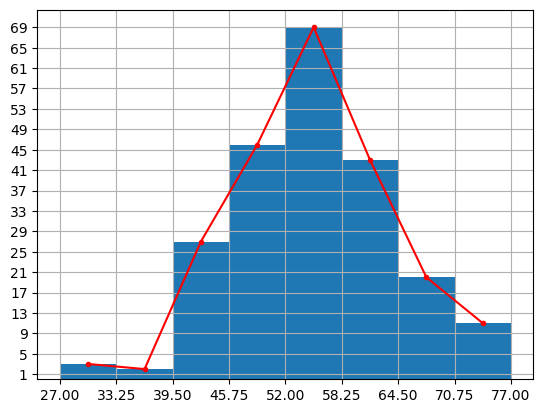

In [5]:
# Вычисления
midpoints = (intervals[:-1] + intervals[1:]) / 2

# Вывод результатов
plt.bar(midpoints, freqs, width=h)
plt.plot(midpoints, freqs, '.-', color='red')
plt.xticks(intervals)
plt.yticks(range(1, freqs.max() + 1, 4))
plt.grid()
plt.show()

Теперь запишем эмпирическую функцию распределения, основываясь на интервалах и $w_i$:
$$F(x) = \begin{cases}
0,& x \leqslant 27 \\
0.01357, & 27 < x \leqslant 33.25 \\
0.02262, & 33.25 < x \leqslant 39.5 \\
0.14480, & 39.5 < x \leqslant 45.75 \\
0.35294, & 45.75 < x \leqslant 52 \\
0.66516, & 52 < x \leqslant 58.25 \\
0.85973, & 58.25 < x \leqslant 63.5 \\
0.95023, & 64.5 < x \leqslant 70.75 \\
1, & x > 70.75
\end{cases}$$
И построим её график:

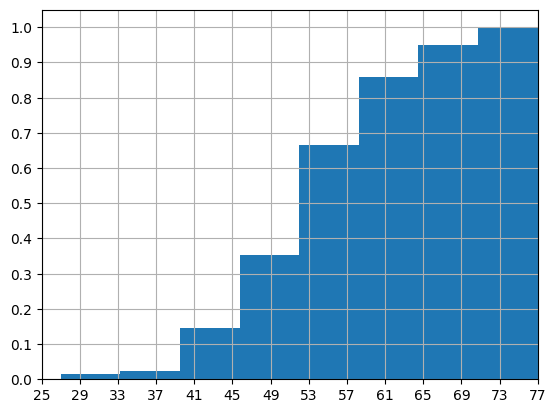

In [6]:
plt.bar(np.concat(([min_B14 - h], intervals[:-1])), np.concat(([0], rel_cum_freqs)), width=h, align='edge')
plt.xticks(range(25, 78, 4))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlim(25, 77)
plt.grid()
plt.show()

Теперь построим кумуляту, используя интервалы и $S_i$:

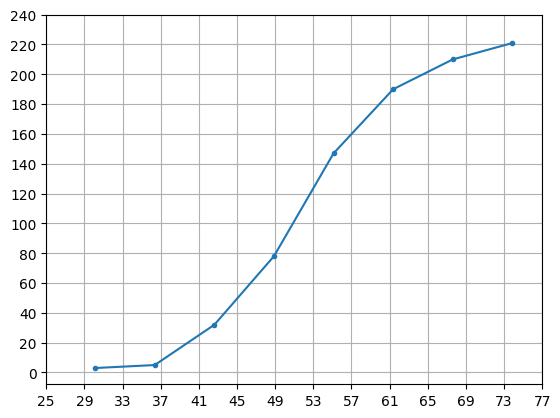

In [7]:
plt.plot(midpoints, cumulative_freqs, '.-')
plt.xticks(range(25, 78, 4))
plt.yticks(range(0, B14.size + 20, 20))
plt.grid()
plt.show()

Перейдём к расчёту начальных эмпирических моментов. Нам понадобится формула $M_k = E[X^k]$.  
Построим таблицу, в которой будут указаны интервал, его среднее значение $x_i$, а также $f_i$ вместе с $x_i \cdot f_i$, $x_i^2 \cdot f_i$, $x_i^3 \cdot f_i$ и $x_i^4 \cdot f_i$:

In [69]:
# Вычисления
xf = np.multiply(midpoints, freqs)
x2f = np.multiply(np.power(midpoints, 2), freqs)
x3f = np.multiply(np.power(midpoints, 3), freqs)
x4f = np.multiply(np.power(midpoints, 4), freqs)

# Вывод результатов
print('x_i', 'f_i', 'x_i*f_i', 'x_i^2*f_i', 'x_i^3*f_i', 'x_i^4*f_i', sep='\t\t')
for i in range(len(midpoints)):
    print(midpoints[i], '', freqs[i], '', f'{xf[i]:<8.3f}', f'{x2f[i]:.3f}', '', f'{x3f[i]:.3f}', '', f'{x4f[i]:.3f}', sep='\t')
print('\nСуммы:\t', freqs.sum(), '', xf.sum(), f'{x2f.sum():.3f}', '', f'{x3f.sum():.3f}', '', f'{x4f.sum():.3f}', sep='\t')

x_i		f_i		x_i*f_i		x_i^2*f_i		x_i^3*f_i		x_i^4*f_i
30.125		3		90.375  	2722.547		82016.725		2470753.829
36.375		2		72.750  	2646.281		96258.480		3501402.227
42.625		27		1150.875	49056.047		2091013.998		89129471.667
48.875		46		2248.250	109883.219		5370542.316		262485255.714
55.125		69		3803.625	209674.828		11558324.900		637152660.134
61.375		43		2639.125	161976.297		9941295.221		610146994.171
67.625		20		1352.500	91462.812		6185172.695		418272303.521
73.875		11		812.625 	60032.672		4434913.635		327629244.768

Суммы:		221		12170.125	687454.703		39759537.971		2350788086.031


C помощью данных в таблице найдём начальные моменты, разделив суммы соответствующих столбцов на общее количество элементов выборки (в данном случае 221). Таким образом, получим следующие значения:

In [77]:
# Вычисления
M_1, M_2, M_3, M_4 = ((i.sum() / freqs.sum()) for i in [xf, x2f, x3f, x4f])

# Вывод результатов
print('M_1', 'M_2', '\tM_3', '\tM_4', sep='\t\t')
print(M_1.round(3), M_2.round(3), M_3.round(3), M_4.round(3), sep='\t\t')
print('\nM(x) = ', B14.mean())

M_1		M_2			M_3			M_4
55.068		3110.655		179907.412		10637050.163

M(x) =  54.800904977375566


Математическое ожидание выборки близко к первому начальному моменту, что говорит о том, что оно было найдено верно.

Теперь вычислим центральные моменты. Для этого воспользуемся формулой $M_k = E[(X - M_1)^k]$.

In [78]:
# Вычисления
m_1 = 0
m_2 = M_2 - M_1 ** 2
m_3 = M_3 - 3 * M_1 * M_2 + 2 * M_1 ** 3
m_4 = M_4 - 4 * M_1 * M_3 + 6 * M_1 ** 2 * M_2 - 3 * M_1 ** 4

# Вывод результатов
print('m_1', 'm_2', 'm_3', 'm_4', sep='\t\t')
print(m_1, m_2.round(3), m_3.round(3), m_4.round(3), sep='\t\t')

print('\nD(x) = ', B14.var())

m_1		m_2		m_3		m_4
0		78.122		4.418		18379.091

D(x) =  77.16398108146842


Здесь, аналогично, второй центральный момент близок к дисперсии. Отклонения связаны с тем, что мы отталкивались от середин интервалов при формировании таблицы и в дальнейших расчётах.

Найдём моду и медиану выборки:

In [80]:
# Вычисления
mode, median = np.bincount(B14).argmax(), np.median(B14).astype(int)

# Вывод результатов
print('Мода:', mode, sep='\t\t')
print('Медиана:', median, sep='\t')

Мода:		55
Медиана:	55


Коэффициенты ассиметрии и эксцесса находятся по формулам: $A = \frac{m_3}{D(x)^{\frac{3}{2}}}$ и $Ex = \frac{m_4}{D(x)^2} - 3$. Посчитаем их:

In [81]:
# Вычисления
A = m_3 / B14.var() ** (3 / 2)
Ex = m_4 / B14.var() ** 2 - 3

# Вывод результатов
print('A:', A.round(3), sep='\t')
print('Ex:', Ex.round(3), sep='\t')

A:	0.007
Ex:	0.087


И вновь выборка имеет нормальное распределение. Об этом нам говорит близость $M(x)$ к моде и медиане равной 55. Коэффициент ассиметрии близок к нулю, что говорит о том, что распределение симметрично, а эксцесс равне 0.087, что близко к эксцессу нормального распределения, равного нулю.


**Работа выполнена.**